## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2
## WEEK 4

# Question 2

## EXPLORE ABOUT Random Restart Hill Climbing 

### Objective: This work aims to apply different Hill Climbing algorithms—simple Hill Climbing, Stochastic Hill Climbing, and Steepest Ascent Hill Climbing—to solve a Job Scheduling 

#### Optimization problem. The goal is to minimize the total processing time of jobs on multiple machines by efficiently assigning jobs to machines while respecting the constraints. 

#### Deliverables Required: 
    1. Python Implementation: 
        o A Python implementation of Simple Hill Climbing, Stochastic Hill Climbing, and Steepest Ascent Hill Climbing for solving the job scheduling problem. 
    o The implementation should include: 
        ▪ Generation of random initial schedules. 
        ▪ Calculation of the total processing time based on job assignments. 
        ▪ Performance comparison across different job sizes. 
        
    2. Heuristic Function: 
        o An explanation of the heuristic function used to evaluate the quality of job schedules. 
    o The heuristic function should calculate the total processing time or cost for each schedule. 
    
    3. Algorithm Comparison: 
    o A detailed comparison of the performance of the three algorithms: 
        ▪ Metrics to include: total processing time, execution time, and success rate (i.e., finding an optimal solution or near-optimal solution). 
    ▪ Comparison should be made across varying numbers of jobs (e.g., 10, 50, 100,200, 500). And number of machine (ex: 10, 100, 100,1000, 10000, 100000) 
    
    4. Graphs and Results: 
        o Graphs or tables showing the performance of each algorithm in terms of total processing time and execution time for different job sets. 
    o A discussion of the strengths and weaknesses of each algorithm based on the results.

In [1]:
import random
import time
import matplotlib.pyplot as plt

In [2]:
def generate_initial_schedule(num_jobs, num_machines):
    schedule = [[] for _ in range(num_machines)]  
    job_durations = [random.randint(1, 10) for _ in range(num_jobs)]  
    for job_duration in job_durations:
        machine = random.choice(range(num_machines))  
        schedule[machine].append(job_duration)
    return schedule

In [3]:
def makespan(schedule):
    return max([sum(machine) for machine in schedule])  

In [4]:
def simple_hill_climbing(num_jobs, num_machines, max_iterations=1000):
    schedule = generate_initial_schedule(num_jobs, num_machines)
    current_cost = makespan(schedule)
    
    iteration = 0
    while iteration < max_iterations:
        neighbors = []
        for machine_index in range(num_machines):
            for job_index in range(len(schedule[machine_index])):
                new_schedule = [list(machine) for machine in schedule]  
                job = new_schedule[machine_index].pop(job_index)
                random_machine = random.choice([i for i in range(num_machines) if i != machine_index])
                new_schedule[random_machine].append(job)
                neighbors.append(new_schedule)
        
        neighbor_costs = [makespan(neighbor) for neighbor in neighbors]
        min_cost_index = neighbor_costs.index(min(neighbor_costs))
        
        if neighbor_costs[min_cost_index] < current_cost:
            schedule = neighbors[min_cost_index]
            current_cost = neighbor_costs[min_cost_index]
        else:
            break  
        iteration += 1
        
    return schedule, current_cost

In [5]:
def stochastic_hill_climbing(num_jobs, num_machines, max_iterations=1000):
    schedule = generate_initial_schedule(num_jobs, num_machines)
    current_cost = makespan(schedule)
    
    iteration = 0
    while iteration < max_iterations:
        machine_index = random.choice(range(num_machines))
        if len(schedule[machine_index]) > 0:
            job_index = random.choice(range(len(schedule[machine_index])))
            job = schedule[machine_index].pop(job_index)
            random_machine = random.choice([i for i in range(num_machines) if i != machine_index])
            schedule[random_machine].append(job)
        
        new_cost = makespan(schedule)
        if new_cost < current_cost:
            current_cost = new_cost
        else:
            break  
        iteration += 1
        
    return schedule, current_cost

In [6]:
def steepest_ascent_hill_climbing(num_jobs, num_machines, max_iterations=1000, neighbor_count=10):
    schedule = generate_initial_schedule(num_jobs, num_machines)
    current_cost = makespan(schedule)
    
    iteration = 0
    while iteration < max_iterations:
        neighbors = []
        for machine_index in range(num_machines):
            for job_index in range(len(schedule[machine_index])):
                new_schedule = [list(machine) for machine in schedule]
                job = new_schedule[machine_index].pop(job_index)
                for random_machine in range(num_machines):
                    if random_machine != machine_index:
                        new_schedule[random_machine].append(job)
                        neighbors.append(new_schedule)
        
        neighbors = random.sample(neighbors, min(neighbor_count, len(neighbors)))
        
        neighbor_costs = [makespan(neighbor) for neighbor in neighbors]
        min_cost_index = neighbor_costs.index(min(neighbor_costs))
        
        if neighbor_costs[min_cost_index] < current_cost:
            schedule = neighbors[min_cost_index]
            current_cost = neighbor_costs[min_cost_index]
        else:
            break  
        iteration += 1
        
    return schedule, current_cost

In [7]:
job_sizes = [10, 50, 100]  
machine_sizes = [10, 50, 100]

In [8]:
results = {'SHC': [], 'Stochastic SHC': [], 'SAHC': []}

In [9]:
for num_jobs in job_sizes:
    for num_machines in machine_sizes:
        start_time = time.time()
        _, shc_cost = simple_hill_climbing(num_jobs, num_machines)
        shc_time = time.time() - start_time
        
        start_time = time.time()
        _, stochastic_shc_cost = stochastic_hill_climbing(num_jobs, num_machines)
        stochastic_shc_time = time.time() - start_time
        
        start_time = time.time()
        _, sahc_cost = steepest_ascent_hill_climbing(num_jobs, num_machines)
        sahc_time = time.time() - start_time
        
        # Store results
        results['SHC'].append((shc_cost, shc_time))
        results['Stochastic SHC'].append((stochastic_shc_cost, stochastic_shc_time))
        results['SAHC'].append((sahc_cost, sahc_time))

In [10]:
shc_makespans = [result[0] for result in results['SHC']]
stochastic_shc_makespans = [result[0] for result in results['Stochastic SHC']]
sahc_makespans = [result[0] for result in results['SAHC']]

In [11]:
shc_times = [result[1] for result in results['SHC']]
stochastic_shc_times = [result[1] for result in results['Stochastic SHC']]
sahc_times = [result[1] for result in results['SAHC']]

#### Results

In [14]:
print("Results:")
print("Algorithm | Number of Jobs | Number of Machines | Makespan (Processing Time) | Execution Time (Seconds)")
for i, num_jobs in enumerate(job_sizes):
    for j, num_machines in enumerate(machine_sizes):
        shc_result = results['SHC'][i * len(machine_sizes) + j]
        stochastic_shc_result = results['Stochastic SHC'][i * len(machine_sizes) + j]
        sahc_result = results['SAHC'][i * len(machine_sizes) + j]
        
        print(f"SHC | {num_jobs} | {num_machines} | {shc_result[0]} | {shc_result[1]:.4f}")
        print(f"Stochastic SHC | {num_jobs} | {num_machines} | {stochastic_shc_result[0]} | {stochastic_shc_result[1]:.4f}")
        print(f"SAHC | {num_jobs} | {num_machines} | {sahc_result[0]} | {sahc_result[1]:.4f}")
        print("-" * 80)

Results:
Algorithm | Number of Jobs | Number of Machines | Makespan (Processing Time) | Execution Time (Seconds)
SHC | 10 | 10 | 16 | 0.0000
Stochastic SHC | 10 | 10 | 10 | 0.0000
SAHC | 10 | 10 | 15 | 0.0000
--------------------------------------------------------------------------------
SHC | 10 | 50 | 10 | 0.0010
Stochastic SHC | 10 | 50 | 9 | 0.0000
SAHC | 10 | 50 | 12 | 0.0010
--------------------------------------------------------------------------------
SHC | 10 | 100 | 10 | 0.0000
Stochastic SHC | 10 | 100 | 10 | 0.0000
SAHC | 10 | 100 | 19 | 0.0012
--------------------------------------------------------------------------------
SHC | 50 | 10 | 35 | 0.0000
Stochastic SHC | 50 | 10 | 36 | 0.0000
SAHC | 50 | 10 | 39 | 0.0010
--------------------------------------------------------------------------------
SHC | 50 | 50 | 17 | 0.0351
Stochastic SHC | 50 | 50 | 29 | 0.0000
SAHC | 50 | 50 | 22 | 0.0010
--------------------------------------------------------------------------------


#### makespan vs. job sizes

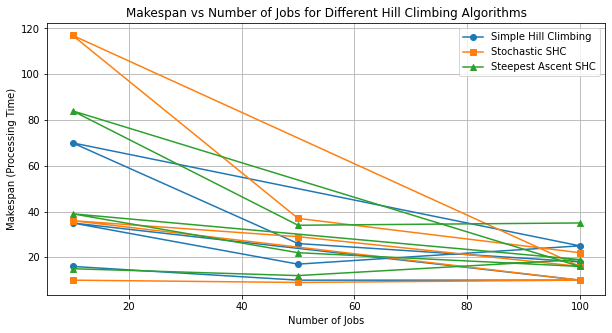

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(job_sizes * len(machine_sizes), shc_makespans, label='Simple Hill Climbing', marker='o')
plt.plot(job_sizes * len(machine_sizes), stochastic_shc_makespans, label='Stochastic SHC', marker='s')
plt.plot(job_sizes * len(machine_sizes), sahc_makespans, label='Steepest Ascent SHC', marker='^')
plt.xlabel('Number of Jobs')
plt.ylabel('Makespan (Processing Time)')
plt.title('Makespan vs Number of Jobs for Different Hill Climbing Algorithms')
plt.legend()
plt.grid(True)
plt.show()

#### execution time vs. job sizes

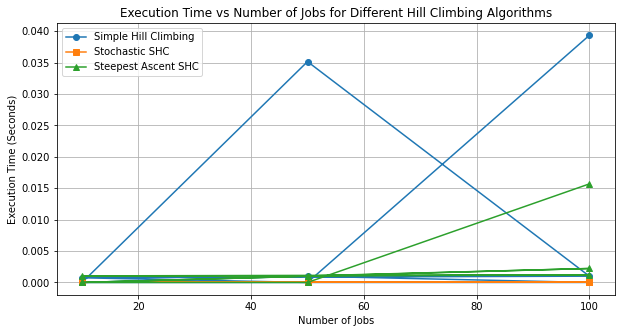

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(job_sizes * len(machine_sizes), shc_times, label='Simple Hill Climbing', marker='o')
plt.plot(job_sizes * len(machine_sizes), stochastic_shc_times, label='Stochastic SHC', marker='s')
plt.plot(job_sizes * len(machine_sizes), sahc_times, label='Steepest Ascent SHC', marker='^')
plt.xlabel('Number of Jobs')
plt.ylabel('Execution Time (Seconds)')
plt.title('Execution Time vs Number of Jobs for Different Hill Climbing Algorithms')
plt.legend()
plt.grid(True)
plt.show()